# EDA - PULIZIA DATASET

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import missingno as mno
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df2=pd.read_csv('/Users/alessandromotta/Downloads/Tweet_vacc.csv', encoding='utf8')
df2=pd.read_csv('/content/drive/MyDrive/SMA/Tweets_Nostri/df_tweet_completo.csv')
df2

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,_id,date,is_RT,location,text,user_id,username,entities
0,0,0.0,5fcbb341ce2a8e9b3d4d23f3,2020-12-05 16:20:12,True,NaN,Premier seeks to divide Manitobans with inflam...,2.699738e+09,Bruce Pelland,NaN
1,1,1.0,5fcbb341ce2a8e9b3d4d23f4,2020-12-05 16:20:12,True,Pakistan,#پولیو_دوبوند_زندگی\nMothers and child caregiv...,1.315189e+18,Sohail Ahmad🇵🇰🇹🇷🇦🇿🇨🇳,NaN
2,2,2.0,5fcbb341ce2a8e9b3d4d23f5,2020-12-05 16:20:12,True,ƬΣXΛƧ,"Democrats ... ""No IDs to vote. Everyone simply...",1.004694e+18,❌❌❌ΛПӨПCΛ§§I⭐️⭐️⭐️,NaN
3,3,3.0,5fcbb341ce2a8e9b3d4d23f6,2020-12-05 16:20:12,True,Norfolk UK,@SkyNews How exhausting it is with this utter ...,2.340775e+09,sandra rouse,NaN
4,4,4.0,5fcbb342ce2a8e9b3d4d23f7,2020-12-05 16:20:13,True,SCHWEIZ,When an anti-vaxxer secretly contemplates gett...,1.221532e+18,Die maskierte Manderine,NaN
...,...,...,...,...,...,...,...,...,...,...
842529,41711,41711.0,5fe074ab3f4fea8a8e64145e,2020-12-21 10:10:46,False,"Atlanta, GA",Now this is a problem. A big problem.,9.871399e+08,Jim Witherspoon,NaN
842530,41712,41712.0,5fe074ac3f4fea8a8e64145f,2020-12-21 10:10:46,True,"California, USA",I’m an RN who has to work w covid patients and...,8.191394e+17,Stacey Lapham,NaN
842531,41713,41713.0,5fe074ac3f4fea8a8e641460,2020-12-21 10:10:46,False,"Cape Town, South Africa",Govt monitors anti-vax activities on social me...,1.106644e+18,David Gautier,NaN
842532,41714,41714.0,5fe074ac3f4fea8a8e641461,2020-12-21 10:10:46,False,United Kingdom,@reasonoverfear @JosephineFitzm1 @MichealMarti...,3.292456e+08,CLARE EVANS 💙,NaN


In [ ]:
tweets_df=df2.copy()

In [ ]:
tweets_df.describe()

,Unnamed: 0.1,user_id
count,8.425340e+05,8.174980e+05
mean,1.536146e+12,4.437515e+17
std,1.410023e+15,5.462923e+17
min,0.000000e+00,7.670000e+02
25%,3.049800e+04,2.895482e+08
50%,8.554950e+04,2.696600e+09
75%,2.900028e+05,1.028756e+18
max,1.294255e+18,1.340956e+18


**TRATTAMENTO DEI VALORI NULLI**

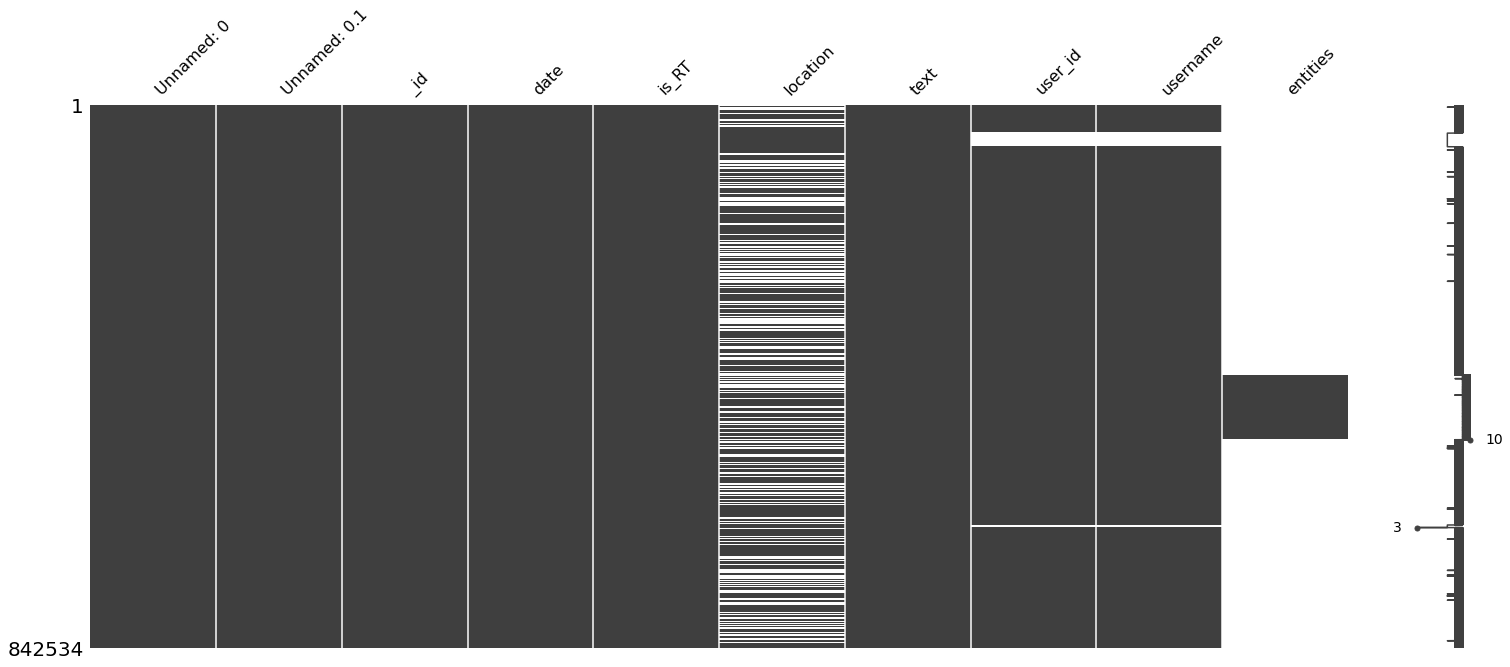

In [ ]:
#valori nulli iniziali
mno.matrix(tweets_df)

In [ ]:
#conteggio dei valori nulli iniziali
tweets_df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
_id                  0
date                 1
is_RT                1
location        282981
text                 1
user_id          25036
username         25077
entities        742361
dtype: int64

In [ ]:
#filtro righe che non hanno text e username vuoto
tweets_df2=tweets_df[tweets_df['username'].notna()]

In [ ]:
#verifica dei valori nulli 
tweets_df2.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
_id                  0
date                 0
is_RT                0
location        282951
text                 0
user_id              0
username             0
entities        717288
dtype: int64

**TRATTAMENTO DEI BOT E DEGLI ACCOUNT**

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    tt['Percentage']=tt['Uniques']/tt['Total']
    return(np.transpose(tt))

In [ ]:
#conteggio dei valori unici nel dataset
unique_values(tweets_df2)

,Unnamed: 0,Unnamed: 0.1,_id,date,is_RT,location,text,user_id,username,entities
Total,842534.000000,842534.000000,842534.000000,842533.000000,842533.000000,559553.000000,842533.000000,817498.000000,817457.000000,100173.000000
Uniques,558366.000000,498877.000000,817507.000000,84594.000000,2.000000,116824.000000,330255.000000,495640.000000,439963.000000,37194.000000
Percentage,0.662722,0.592115,0.970296,0.100404,0.000002,0.208781,0.391979,0.606289,0.538209,0.371298


In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
#visualizzazione dei valori più frequenti
most_frequent_values(tweets_df2)

,Unnamed: 0,Unnamed: 0.1,_id,date,is_RT,location,text,user_id,username,entities
Total,817457,817457,817457,817457,817457,534506,817457,817457,817457,100169
Most frequent item,0,0,5fd36136babf539b48710961,2020-12-15 18:07:48,True,United States,"The Swine Flu (H1N1), and the attempt for a va...",1.23847e+18,.,"{'hashtags': [], 'symbols': [], 'urls': [], 'u..."
Frequence,5,7,1,48,549418,13743,9762,442,632,9767
Percent from total,0.001,0.001,0,0.006,67.211,2.571,1.194,0.054,0.077,9.751


Notiamo che l'utente con ID '5fd36136babf539b48710961' e username '.' è quello che ha twittato più frequentemente.

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette="RdBu")
    else:
        g = sns.countplot(df[feature], palette="RdBu")
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


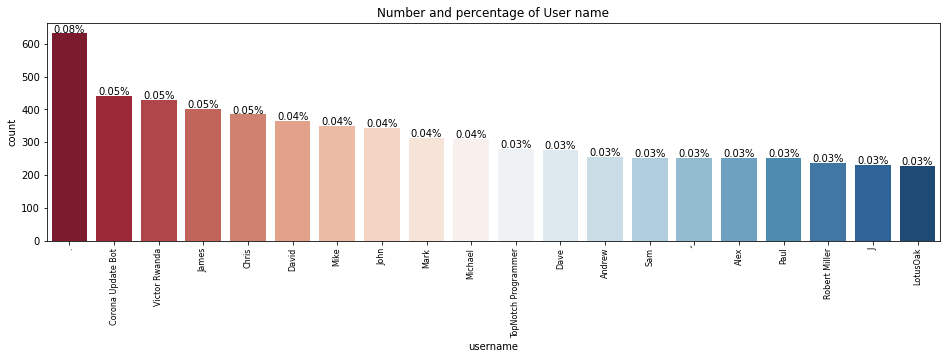

In [ ]:
plot_count("username", "User name", tweets_df2, 4)

Alcuni uteni sono evidentemente dei bot, per questo motivo verranno eleiminati i loro tweets.

In [ ]:
len(tweets_df2)

817457

In [ ]:
#elimino alcuni utenti che sono sicuramente bot
tweets_df3=tweets_df2[tweets_df2['username']!='.']
tweets_df3=tweets_df3[tweets_df3['username']!='Corona Update Bot']

In [ ]:
#elimino righe dove username contiene la stringa bot 
tweets_df4=tweets_df3[~tweets_df3['username'].str.contains(r'bot')]
tweets_df4=tweets_df3[~tweets_df3['username'].str.contains(r'Bot')]

In [ ]:
len(tweets_df4)

815620

Verifica dei tweet attraverso la location

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


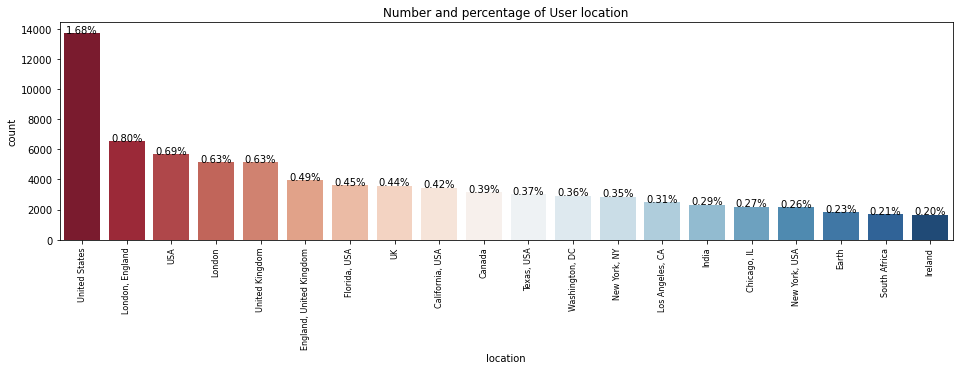

In [ ]:
plot_count("location", "User location", tweets_df4,4)

Un dato sospetto è che un'alta percentuale di tweets provengono dall'india.

In [ ]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

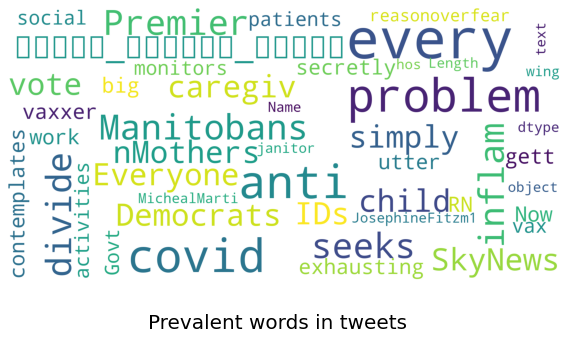

In [ ]:
show_wordcloud(tweets_df4['text'], title = 'Prevalent words in tweets')

In [ ]:
pp=tweets_df4.text[:]

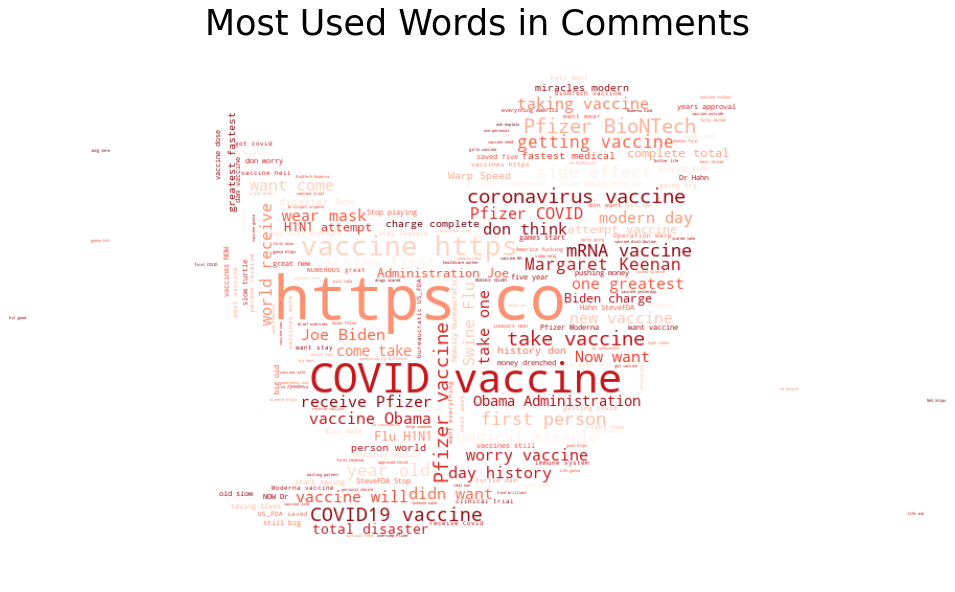

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://banner2.cleanpng.com/20180723/vvy/kisspng-computer-icons-clip-art-twitter-logo-vector-5b5693f7952128.7797517715324006316109.jpg')
bird = np.array(Image.open(BytesIO(response.content)))

fig, (ax2) = plt.subplots(1, 1, figsize=[17, 10])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(pp))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Most Used Words in Comments',fontsize=35);

In [ ]:
#selezione solo quelli che non sono retwit
vax_noret=tweets_df4[tweets_df4['is_RT']==False]

In [ ]:
len(vax_noret)

267665

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128161 missing from current font.
  font.set_text(s, 0, flags=flags)


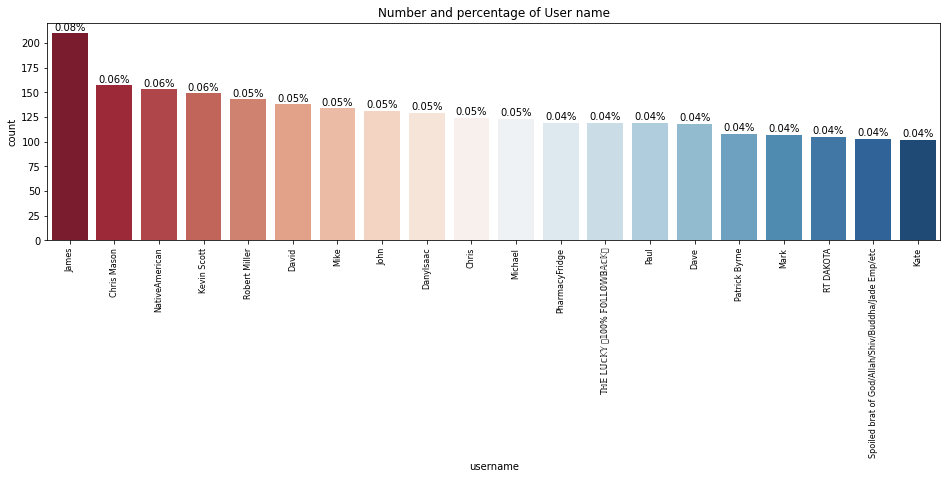

In [ ]:
plot_count("username", "User name", vax_noret,4)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


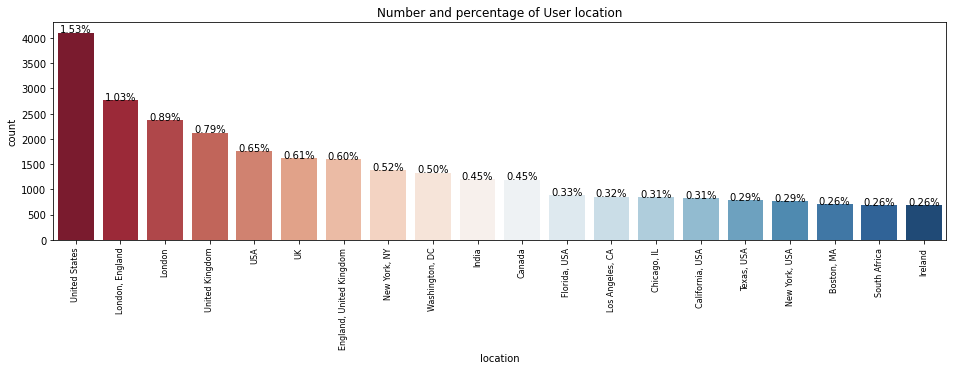

In [ ]:
plot_count("location", "User location", vax_noret,4)

In [ ]:
bot=pd.read_csv('/content/drive/MyDrive/SMA/Tweets_Nostri/Dati BOT/bot_finale.csv')

**SCARICO IL DATASET PULITO**

In [ ]:
df_tweet_clean=vax_noret

In [ ]:
df_tweet_clean.to_csv('/content/drive/MyDrive/SMA/df_tweet_clean.csv')